In [1]:
import pandas as pd
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


movies_data = pd.read_csv("movies/movies.csv",  encoding='latin-1')

# Leer datos de un csv
movies_data

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,1993-10-15,6.5,223,3,3,2,15,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,920081,0,Action|Horror,NaN,NaN,NaN,NaN,0.0,100,False,...,16.662,2021-11-26,6.8,108,2,1,1,10,2,4
9996,920143,0,Comedy,NaN,Caracol Televisiï¿½n|Dago Garcï¿½a Producciones,CO|CO,Colombia,0.0,97,False,...,491.706,2021-12-25,1.5,2,1,2,1,8,1,1
9997,922017,0,Comedy,NaN,NaN,NaN,Nigeria,0.0,112,False,...,565.658,2021-12-17,6.1,30,1,1,17,1,0,922017
9998,922162,0,NaN,https://www.netflix.com/title/81425229,NaN,NaN,United States of America,0.0,59,False,...,9.664,2021-12-17,6.0,1,1,0,0,0,922162,The Witcher: Fireplace


# PCA

## 1) Estudie si es posible hacer transformaciones en las variables categóricas para incluirlas en el PCA, ¿valdrá la pena?

 Podría valer la pena transformar variables como genresAmount, productionCoAmount, productionCountriesAmount, actorsAmount y popularity. Variables como director, actors, originalTitle, title, homePage, releaseDate y video probablemente no aportan información útil para el PCA, castWomenAmount y castMenAmount no se toman en cuenta por el actorsAmount, que es un dato mas general y mejor de cuantos actores trabajaron en la pelicula.

In [2]:
pca_dataset = movies_data[['budget', 'revenue', 'runtime', 'voteAvg', 'voteCount', 'genresAmount', 'productionCoAmount', 'productionCountriesAmount', 'actorsAmount', 'popularity']].dropna()

pca_dataset


,budget,revenue,runtime,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,popularity
0,4000000,4257354.0,98,5.7,2077,2,2,1,25,20.880
1,21000000,12136938.0,110,6.5,223,3,3,2,15,9.596
2,11000000,775398007.0,121,8.2,16598,3,2,1,105,100.003
3,94000000,940335536.0,100,7.8,15928,2,1,1,24,134.435
4,55000000,677387716.0,142,8.5,22045,3,2,1,76,58.751
...,...,...,...,...,...,...,...,...,...,...
9995,0,0.0,100,6.8,108,2,1,1,10,16.662
9996,0,0.0,97,1.5,2,1,2,1,8,491.706
9997,0,0.0,112,6.1,30,1,1,17,1,565.658
9998,0,0.0,59,6.0,1,1,0,0,0,9.664


## 2) Es conveniente hacer un Análisis de Componentes Principales?

### test de esfericidad de Bartlett.

In [3]:
xi_cuadrado, p_value = calculate_bartlett_sphericity(pca_dataset)
print(f'Valor Chi-cuadrado: {xi_cuadrado}')
print(f'Valor p: {p_value}')

if p_value < 0.05:
    print("Segun la prueba de Esfericidad de Bartlett, se puede aplicar PCA")
else:
    print("Segun la prueba de Esfericidad de Bartlett, no se puede aplicar PCA")

Valor Chi-cuadrado: 21381.33617327996
Valor p: 0.0
Segun la prueba de Esfericidad de Bartlett, se puede aplicar PCA


### Indice KMO

In [4]:
kmo, kmo_model = calculate_kmo(pca_dataset)
print(f'Índice KMO: {kmo_model}')

if 0.90 < kmo_model < 1.00:
    print("Variables estan muy correlacionadas, Se puede usar PCA")
elif 0.80 < kmo_model < 0.89:
    print("Variables correlacionadas, Se puede usar PCA")
elif 0.70 < kmo_model < 0.79:
    print("Se puede usar PCA aunque no es recomendable")
elif kmo_model < 0.68:
    print("Se recomienda no usar PCA")


Índice KMO: 0.7131675893406781
Se puede usar PCA aunque no es recomendable


### Al tener las dos pruebas con valores recomendados y aceptables, se hara el PCA

## 3) PCA

In [5]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(pca_dataset)

model_pca = pca_pipe.named_steps["pca"]
print(f'Cantidad de Componentes Generados: {len(model_pca.components_)}')

print("Resultado del PCA:")
pd.DataFrame(
    data = model_pca.components_,
    columns = pca_dataset.columns,
    index = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7', 'PC8', 'PC9', 'PC10']
)

Cantidad de Componentes Generados: 10
Resultado del PCA:


,budget,revenue,runtime,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,popularity
PC1,0.512325,0.537284,0.284490,0.184140,0.521470,0.153101,0.119336,-0.037235,-0.043034,0.145452
PC2,-0.150047,-0.181040,0.486020,0.282935,-0.064806,-0.139956,0.488891,0.329017,-0.471147,-0.188171
PC3,-0.236831,-0.110413,0.190988,0.753104,0.025573,-0.014419,-0.398266,-0.401133,0.044257,0.075726
PC4,0.001453,-0.113343,-0.023941,-0.058728,-0.101947,0.675588,0.363307,-0.545875,-0.096965,-0.277388
PC5,-0.065044,-0.083941,0.043935,0.283518,-0.041700,0.380962,0.204612,0.473471,0.702483,0.003990
PC6,-0.047124,-0.100497,-0.127727,0.044658,-0.159946,0.325837,0.061293,0.120870,-0.316740,0.847896
PC7,-0.030375,-0.066737,0.156851,-0.078101,-0.045032,-0.455371,0.530126,-0.437848,0.393879,0.355875
PC8,0.062390,-0.103677,0.771011,-0.401389,-0.220674,0.167877,-0.355517,-0.029313,0.125771,0.099185
PC9,0.697691,-0.026115,-0.082344,0.255685,-0.649866,-0.114361,-0.008804,-0.006262,-0.005941,-0.069523
PC10,-0.401098,0.787707,0.041406,0.021480,-0.460922,0.020485,0.054870,-0.009043,-0.002504,-0.022255


In [6]:
print('----------------------------------------------------\nPorcentaje de varianza explicada por cada componente\n----------------------------------------------------')
print(model_pca.explained_variance_ratio_)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.27481006 0.11490125 0.1039553  0.10022744 0.097273   0.09668467
 0.09026598 0.07155123 0.03180707 0.01852401]


### Visualizacion de variables


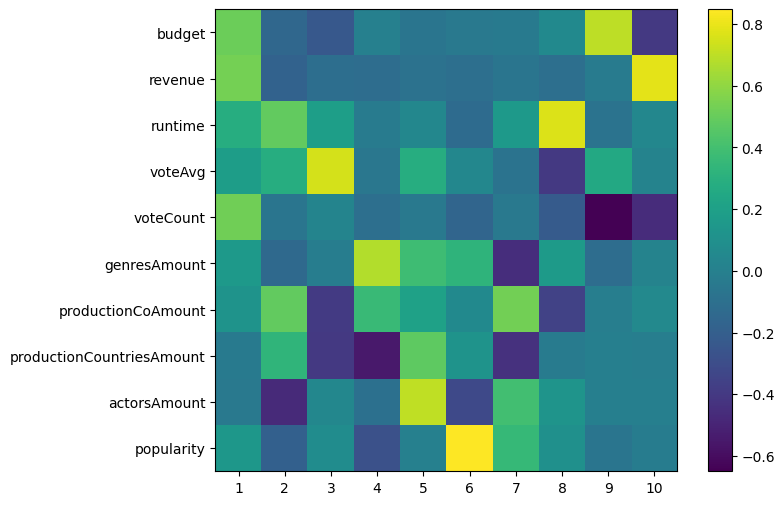

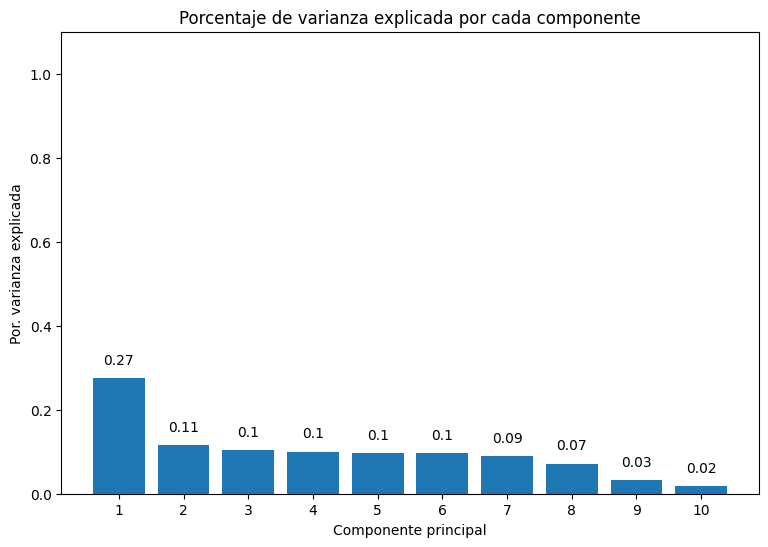

In [7]:
## Heatmap
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
componentes = model_pca.components_
plt.imshow(componentes.T)
plt.yticks(range(len(pca_dataset.columns)), pca_dataset.columns)
plt.xticks(range(len(pca_dataset.columns)), np.arange(model_pca.n_components_)+1)
plt.grid(False)
plt.colorbar();

## Scree Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
ax.bar(
    x      = np.arange(model_pca.n_components_) + 1,
    height = model_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(pca_dataset.columns)) + 1, model_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(model_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

### Regla 80%-90%

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.27481006 0.38971131 0.49366661 0.59389405 0.69116705 0.78785172
 0.87811769 0.94966892 0.98147599 1.        ]


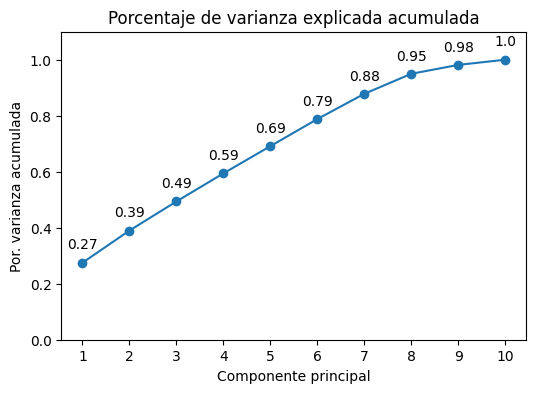

In [8]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = model_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(pca_dataset.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(pca_dataset.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(model_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

### Segun la regla, la curva donde mas componentes ya no mejoran significativamente la varianza es en los 8 componentes

In [9]:
cargas = model_pca.components_[:8]

pd.DataFrame(
    data=cargas,
    columns=pca_dataset.columns,
    index=[f'PC{i+1}' for i in range(8)]
)

,budget,revenue,runtime,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,popularity
PC1,0.512325,0.537284,0.284490,0.184140,0.521470,0.153101,0.119336,-0.037235,-0.043034,0.145452
PC2,-0.150047,-0.181040,0.486020,0.282935,-0.064806,-0.139956,0.488891,0.329017,-0.471147,-0.188171
PC3,-0.236831,-0.110413,0.190988,0.753104,0.025573,-0.014419,-0.398266,-0.401133,0.044257,0.075726
PC4,0.001453,-0.113343,-0.023941,-0.058728,-0.101947,0.675588,0.363307,-0.545875,-0.096965,-0.277388
PC5,-0.065044,-0.083941,0.043935,0.283518,-0.041700,0.380962,0.204612,0.473471,0.702483,0.003990
PC6,-0.047124,-0.100497,-0.127727,0.044658,-0.159946,0.325837,0.061293,0.120870,-0.316740,0.847896
PC7,-0.030375,-0.066737,0.156851,-0.078101,-0.045032,-0.455371,0.530126,-0.437848,0.393879,0.355875
PC8,0.062390,-0.103677,0.771011,-0.401389,-0.220674,0.167877,-0.355517,-0.029313,0.125771,0.099185
